In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '101001'

In [7]:
circuit = QuantumCircuit(6+1,6)
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)

circuit.barrier()

# Code that encodes the secret number
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

circuit.barrier()

circuit.h([0,1,2,3,4,5])

circuit.barrier()

circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])

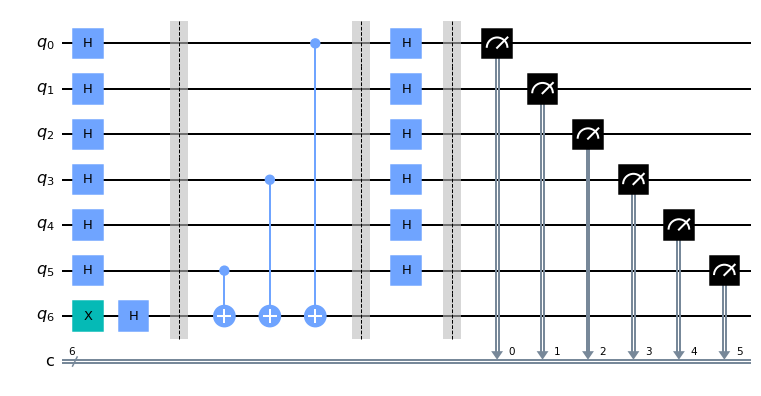

In [8]:
circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


In [14]:
# Same code as previously but in more compact form.

secretnumber = '101000101011'

circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

# Code that encodes the secret number
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()

circuit.h(range(len(secretnumber)))

circuit.barrier()

circuit.measure(range(len(secretnumber)),range(len(secretnumber)))

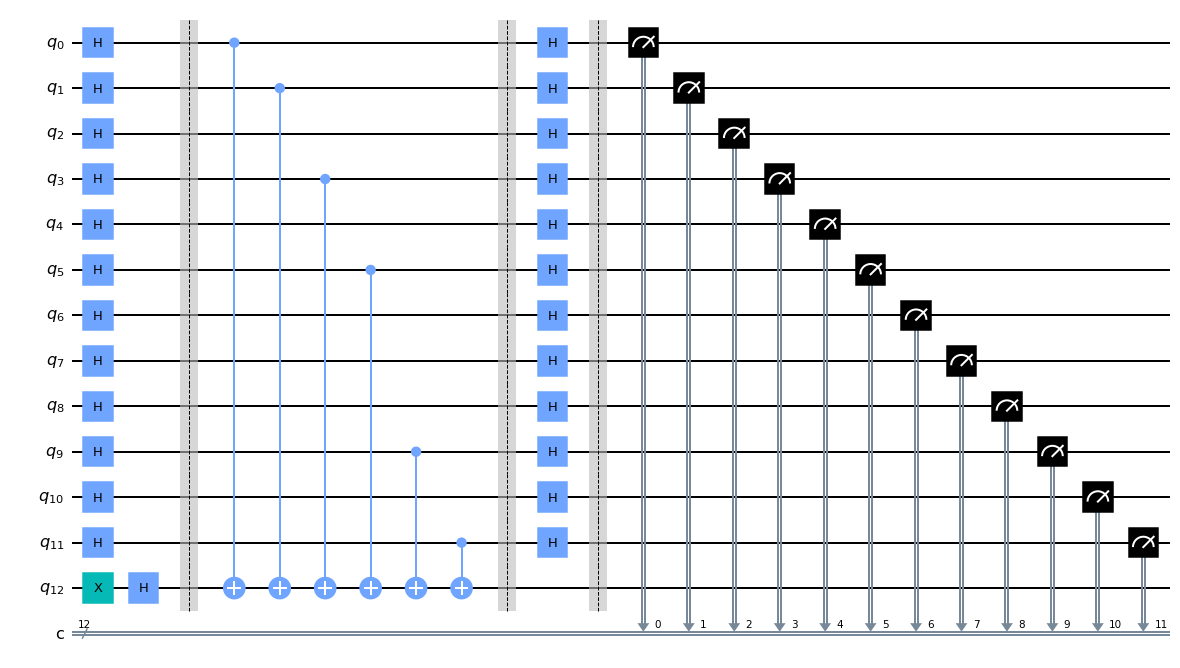

In [15]:
circuit.draw(output='mpl')

In [16]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101000101011': 1}
